In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Normalization/Share_Review.xlsx', names=['Product', 'Review', 'Rating'])
df.head()

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
2,Cosmetic Organizer/ Storage Box,-,4
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
4,Newari Shahi Pulao Basmati Rice 5 Kg,-,5


In [ ]:
df.head(5)

,Product,Review,Rating
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5
2,Cosmetic Organizer/ Storage Box,-,4
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5
4,Newari Shahi Pulao Basmati Rice 5 Kg,-,5


In [ ]:
df = df[~df["Review"].isin(["", "-"])]

In [ ]:

df.Rating.value_counts()

,count
Rating,
5,10967
1,2279
4,1436
3,1063
2,694


In [ ]:
df.isnull().sum()

,0
Product,0
Review,1
Rating,0


In [ ]:
len(df)

16439

In [ ]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Text Polarity
from textblob import TextBlob

# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Word Cloud
from wordcloud import WordCloud

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

# TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Resampling
from imblearn.over_sampling import SMOTE
from collections import Counter

# Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



In [ ]:
import re
import string

def Text_Cleaning(Text):
    if not isinstance(Text, str):  # Check if input is a string
        print(Text)
        return ""  # Return empty string for NaN or non-string values

    # Lowercase the text
    Text = Text.lower()

    # Remove punctuations
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    # Remove numbers
    Text = re.sub(r'\d+', '', Text)

    # Remove possible links
    Text = re.sub(r'https?://\S+|www\.\S+', '', Text)

    # Delete newlines
    Text = re.sub(r'\n', '', Text)

    return Text

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words, wordnet as wn

# Download necessary resources
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("words")

# Initialize lemmatizer and spell checker
Lemmatizer = WordNetLemmatizer()

# Load English words dictionary
english_vocab = set(words.words())

# Define stopwords (excluding "not")
Stopwords = set(nltk.corpus.stopwords.words("english")) - {"not"}

def is_strictly_english(word):
    """Check if a word is a valid English word using NLTK dictionary and WordNet."""
    return word.lower() in english_vocab or bool(wn.synsets(word))


def Text_Processing(Text):
    """Processes text by removing stopwords, correcting spelling, and lemmatizing words."""
    Processed_Text = []

    # Tokenization
    Tokens = nltk.word_tokenize(Text)

    for word in Tokens:
        if word not in Stopwords:  # Remove stopwords
            # Correct spelling if not strictly English
            # corrected_word = correct_spelling(word) if not is_strictly_english(word) else word
            # Lemmatization
            lemmatized_word = Lemmatizer.lemmatize(word)
            Processed_Text.append(lemmatized_word)

    return " ".join(Processed_Text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
df["clean_reviews"] = df["Review"].apply(lambda Text: Text_Cleaning(Text))

nan


In [ ]:
import nltk
nltk.download('punkt_tab')

df["cleaned_reviews"] = df["clean_reviews"].apply(lambda Text: Text_Processing(Text))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df.head(5)

,Product,Review,Rating,clean_reviews,cleaned_reviews
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...


In [ ]:
def Labelling(Rows):
  if(Rows["Rating"] > 3.0):
    Label = "Positive"
  elif(Rows["Rating"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [ ]:
df["sentiment"] = df.apply(Labelling, axis = 1)

In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive
...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good hai lagaune manxe thiyena big...,Positive
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,Negative
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,Positive
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare ni ...,Negative


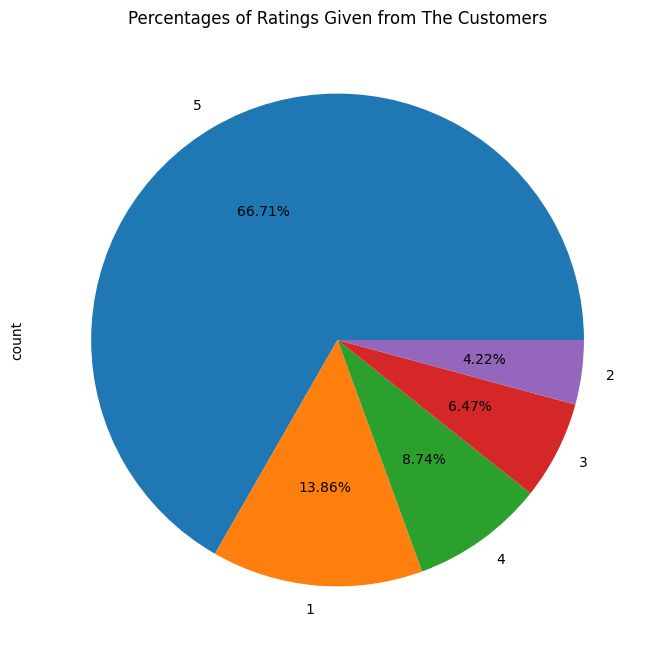

In [ ]:
df.Rating.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

In [ ]:
df.shape

(16439, 6)

In [ ]:
df.isnull().sum()

,0
Product,0
Review,1
Rating,0
clean_reviews,0
cleaned_reviews,0
sentiment,0


In [ ]:
df.Rating.value_counts()

,count
Rating,
5,10967
1,2279
4,1436
3,1063
2,694


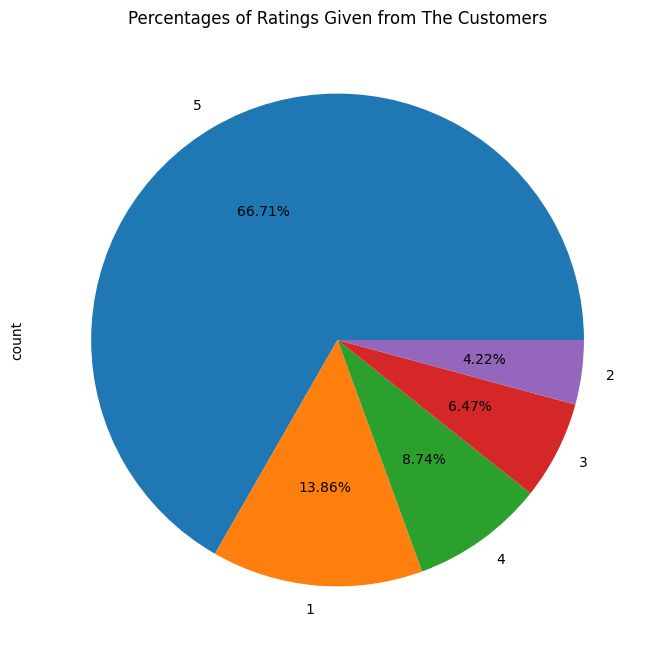

In [ ]:
df.Rating.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(8,8))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

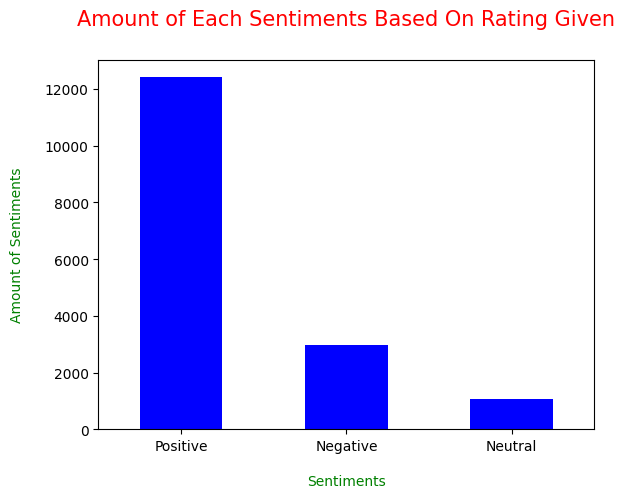

In [ ]:
df["sentiment"].value_counts().plot(kind = "bar", color = "blue")
plt.title("Amount of Each Sentiments Based On Rating Given", loc = "center", fontsize = 15, color = "red", pad = 25)
plt.xlabel("Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Amount of Sentiments", color = "green", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
df.describe(include = "all")

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment
count,16439,16438,16439.000000,16439,16439,16439
unique,8626,10423,NaN,10216,9734,3
top,Winter Beanie Hat Scarf Set Warm Knit Hat Thic...,good,NaN,good,good,Positive
freq,44,154,NaN,246,354,12403
mean,NaN,NaN,4.102135,NaN,NaN,NaN
std,NaN,NaN,1.462212,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN


In [ ]:
df["polarity"] = df["cleaned_reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

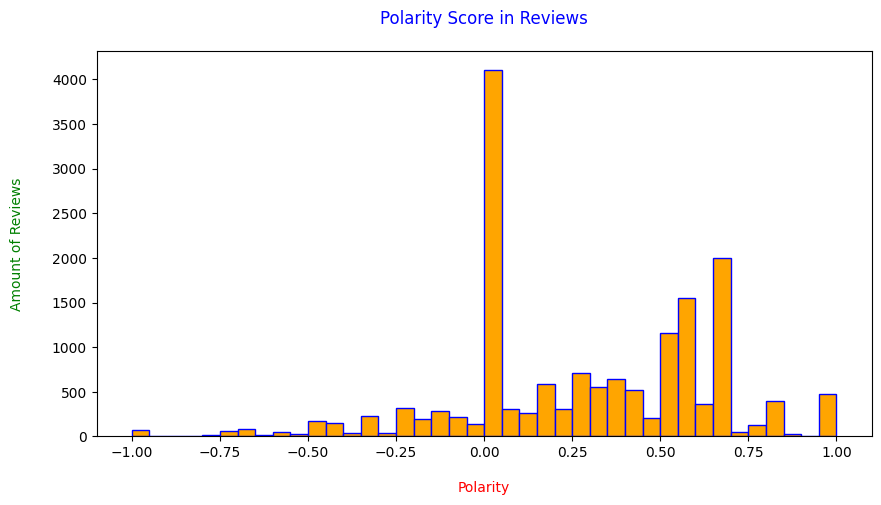

In [ ]:
df["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Reviews", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
df.head()

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303


In [ ]:
df["length"] = df["cleaned_reviews"].astype(str).apply(len)

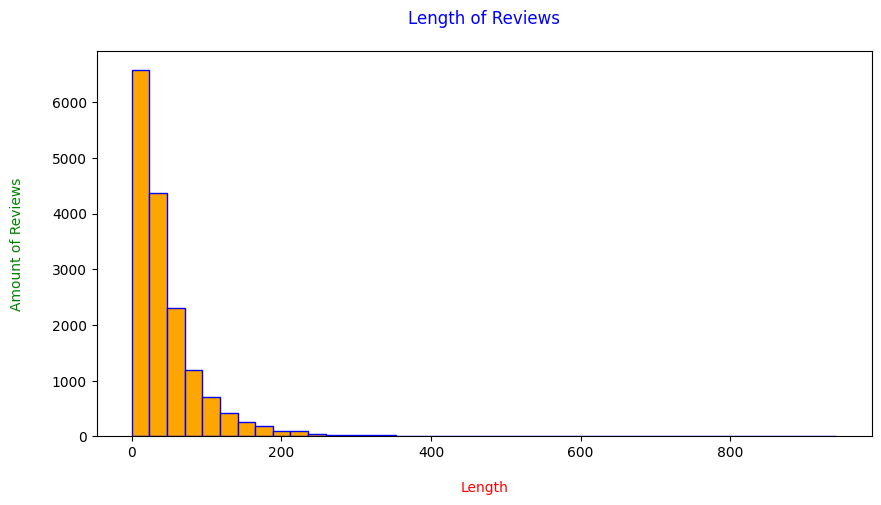

In [ ]:
df["length"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Length of Reviews", color = "blue", pad = 20)
plt.xlabel("Length", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
df["word_counts"] = df["cleaned_reviews"].apply(lambda x: len(str(x).split(' ')))

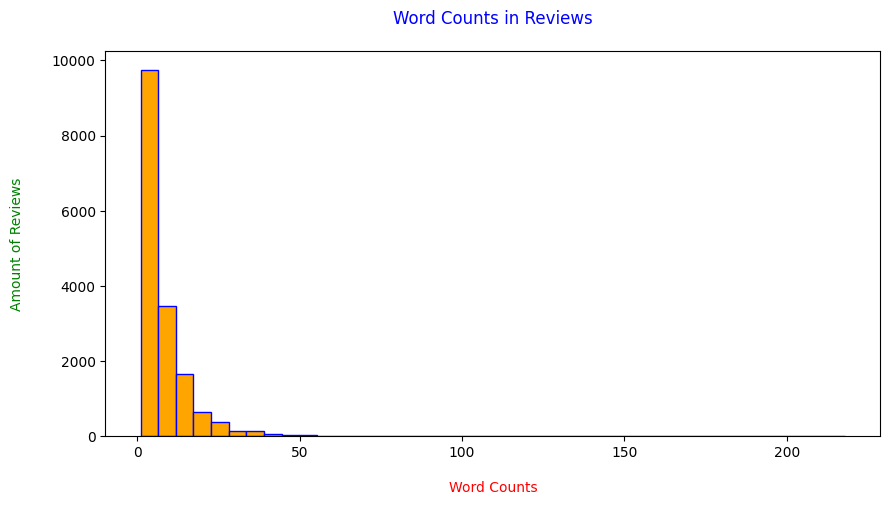

In [ ]:
df["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 20)
plt.xlabel("Word Counts", labelpad = 15, color = "red")
plt.ylabel("Amount of Reviews", labelpad = 20, color = "green")

plt.show()

In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000,60,10
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333,68,10
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000,24,4
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000,11,2
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303,259,39
...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good hai lagaune manxe thiyena big...,Positive,0.700000,124,22
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,Negative,0.000000,19,3
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,Positive,0.383333,73,10
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare ni ...,Negative,-0.100000,75,16


In [ ]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

In [ ]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

In [ ]:
import re

# Function to check if text contains Devanagari script
def contains_devanagari(text):
    if isinstance(text, str):  # Ensure the input is a string
        return bool(re.search(r'[\u0900-\u097F]', text))
    return False

In [ ]:
df = df[~df["cleaned_reviews"].apply(contains_devanagari)]

In [ ]:
Stopwords = list(Stopwords)

In [ ]:
# words = Gram_Analysis(Neutral["cleaned_reviews"], 2, 20)
# words = Gram_Analysis(Positive["cleaned_reviews"], 3, 20)
# Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

In [ ]:
words

In [ ]:
import pandas as pd
import re

# Define sentiment words
positive_words = {"good product", "nice product", "ramro xa", "good quality", "product good",
                  "thank daraz", "really good", "thank much", "satisfied product", "ramro lagyo",
                  "quality good", "fast delivery", "ramro cha", "price range", "love product",
                  "good price", "ekdam ramro", "quality product", "best product"}

negative_words = {"not good", "not working", "waste money", "not satisfied",
                  "product not", "low quality", "different product", "quality not",
                  "not buy", "wrong product", "worst product", "not expected", "poor quality",
                  "damaged product", "not shown", "bad product", "completely different", 'ramro xaena'}

neutral_words = {"not bad", "thikai xa", "quality not", "xa tara", "not expected",
                 "product not", "per price", "thikai cha", "little bit", "thik xa"}

negation_words = {"not", "no", "never", "without"}  # List of negation words

def labelling(row):
    if row["Rating"] > 3.0:
        return "Positive"
    elif row["Rating"] < 3.0:
        return "Negative"
    else:
        return "Neutral"

def contains_negation(text, phrase):
    """
    Check if the given phrase has a negation word before it.
    """
    words = text.split()
    phrase_words = phrase.split()

    for i in range(len(words) - len(phrase_words) + 1):
        # Check if phrase matches
        if words[i:i + len(phrase_words)] == phrase_words:
            # Look for negation before this phrase
            if i > 0 and words[i - 1] in negation_words:
                return True
    return False

def second_level_validation(row):
    text = row["cleaned_reviews"]

    detected_sentiment = None  # Track sentiment change
    for phrase in positive_words:
        if phrase in text:
            if not contains_negation(text, phrase):
                detected_sentiment = "Positive"
                break

    for phrase in negative_words:
        if phrase in text:
            detected_sentiment = "Negative"
            break

    for phrase in neutral_words:
        if phrase in text:
            detected_sentiment = "Neutral"
            break

    # Print cases where changes happen
    if detected_sentiment and detected_sentiment != row["sentiment"]:
        print(f"Review: {row['cleaned_reviews']}\nOriginal: {row['sentiment']} -> New: {detected_sentiment}\n")

    return detected_sentiment if detected_sentiment else row["sentiment"]

# Sample DataFrame
data = {
    "Review": ["piece panty received instead piece packet different size not satisfied product service daraz",
               "one satisfied purchase daraz heartfelt thankful delivery team friendly helpful nbeside everyone know lg ’ product one buy product without single thought nthankful lg cg daraz n", "piece panty received instead piece packet different size not satisfied product service daraz"],
    "Rating": [3, 5, 1],
    "cleaned_reviews": ["piece panty received instead piece packet different size not satisfied product service daraz",
                        "one satisfied purchase daraz heartfelt thankful delivery team friendly helpful nbeside everyone know lg ’ product one buy product without single thought nthankful lg cg daraz n", "piece panty received instead piece packet different size not satisfied product service daraz"]
}

new_df = pd.DataFrame(data)

# First level sentiment assignment
new_df["sentiment"] = df.apply(labelling, axis=1)

new_df["new_sentiment"] = new_df.apply(second_level_validation, axis=1)

# Show rows where sentiment changed
new_mismatched_rows = new_df[new_df["sentiment"] != new_df["new_sentiment"]]

# Debugging output
print("\nFinal Changed Sentiments:")
print(new_mismatched_rows[["cleaned_reviews", "sentiment", "new_sentiment"]])



In [ ]:
new_mismatched_rows

,Review,Rating,cleaned_reviews,sentiment,new_sentiment
0,piece panty received instead piece packet diff...,3,piece panty received instead piece packet diff...,Neutral,Negative
2,piece panty received instead piece packet diff...,1,piece panty received instead piece packet diff...,NaN,Negative


In [ ]:
# Second level sentiment correction with negation handling
df["new_sentiment"] = df.apply(second_level_validation, axis=1)

# Show rows where sentiment changed
mismatched_rows = df[df["sentiment"] != df["new_sentiment"]]


In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts,new_sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000,60,10,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333,68,10,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000,24,4,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000,11,2,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303,259,39,Positive
...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good hai lagaune manxe thiyena big...,Positive,0.700000,124,22,Positive
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,Negative,0.000000,19,3,Negative
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,Positive,0.383333,73,10,Positive
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare ni ...,Negative,-0.100000,75,16,Negative


In [ ]:
df["new_sentiment"] = df.apply(second_level_validation, axis=1)

In [ ]:
mismatched_rows = df[df["sentiment"] != df["new_sentiment"]]

In [ ]:
mismatched_rows


,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts,new_sentiment
101,Mini 4 Blade Multipurpose Spices/ Coffee Grinder,What’s wrong with this product ?\nBlade is too...,5,what’s wrong with this product nblade is too...,’ wrong product nblade far ’ work properly,Positive,-0.133333,42,8,Negative
128,Gloves Men Women Winter Outdoor Sports Anti-Sl...,quality ta thikai cha but touch screen kaam ga...,2,quality ta thikai cha but touch screen kaam ga...,quality ta thikai cha touch screen kaam garena,Negative,0.000000,46,8,Neutral
155,Black Long Wool Outer For Women,not satisfied with the quality.,5,not satisfied with the quality,not satisfied quality,Positive,-0.250000,21,3,Negative
178,Ladies Winter Chelsea Boots,Photo ra real ma the quality is completely dif...,1,photo ra real ma the quality is completely dif...,photo ra real quality completely different dis...,Negative,0.025000,137,19,Neutral
180,Distil Water For Batteries - 1 liter (Pack of 2),it's not good \nwaste product \nruined my battery,5,it s not good nwaste product nruined my battery,not good nwaste product nruined battery,Positive,-0.350000,39,6,Negative
...,...,...,...,...,...,...,...,...,...,...
34272,Masala Beads 2 in 1 Matte Liquid Lipstick & Ma...,Sent me a totally different product. I don't e...,1,sent me a totally different product i don t e...,sent totally different product even time excha...,Negative,-0.100000,95,14,Neutral
34285,Smoked Dried Fish Local 500gm,aru ta thikai chha two fish purai dhusi aako d...,3,aru ta thikai chha two fish purai dhusi aako d...,aru ta thikai chha two fish purai dhusi aako d...,Neutral,0.000000,99,19,Positive
34293,Desktop Stand For Mobile Phone Bracket Holder ...,Very poor quality product and not the same as ...,5,very poor quality product and not the same as ...,poor quality product not ordered check photo i...,Positive,-0.400000,71,10,Neutral
34296,Pack Of 2) Super Bass Stereo Sound Quality Sou...,As expected...thikai xa chij with some bends.....,5,as expected thikai xa chij with some bends ...,expected thikai xa chij bend always kaam chalx...,Positive,0.200000,83,14,Neutral


In [ ]:
df


,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts,new_sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000,60,10,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333,68,10,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000,24,4,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000,11,2,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303,259,39,Positive
...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good hai lagaune manxe thiyena big...,Positive,0.700000,124,22,Positive
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,Negative,0.000000,19,3,Negative
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,Positive,0.383333,73,10,Positive
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare ni ...,Negative,-0.100000,75,16,Negative


In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts,new_sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000,60,10,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333,68,10,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000,24,4,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000,11,2,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303,259,39,Positive
...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good hai lagaune manxe thiyena big...,Positive,0.700000,124,22,Positive
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,Negative,0.000000,19,3,Negative
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,Positive,0.383333,73,10,Positive
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare ni ...,Negative,-0.100000,75,16,Negative


In [ ]:

# Use dropna() so the base DataFrame is not affected
Positive = df[df["new_sentiment"] == "Positive"].dropna()
Neutral = df[df["new_sentiment"] == "Neutral"].dropna()
Negative = df[df["new_sentiment"] == "Negative"].dropna()

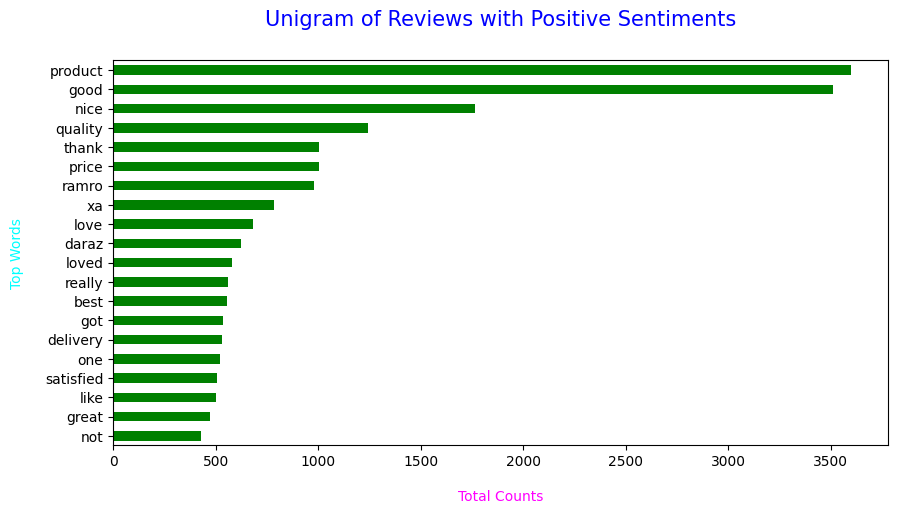

In [ ]:

# Finding Unigram
words = Gram_Analysis(Positive["cleaned_reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

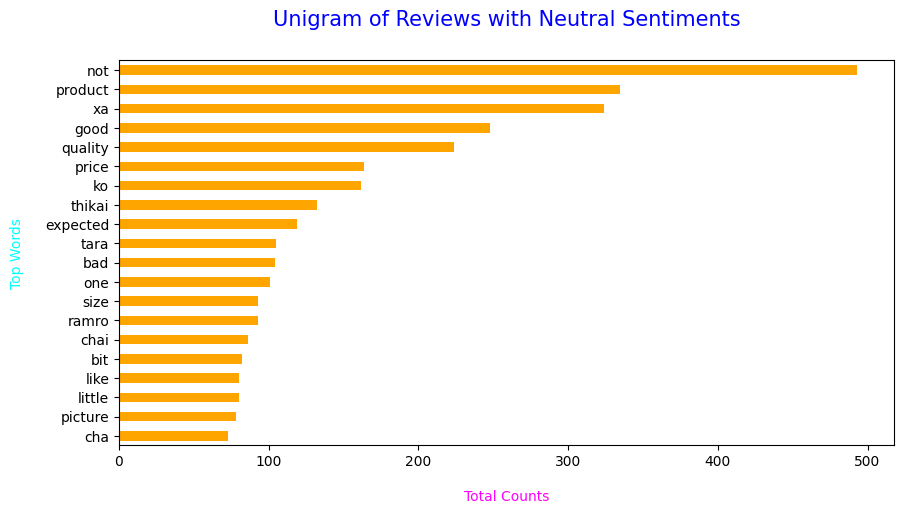

In [ ]:
# Finding Unigram
words = Gram_Analysis(Neutral["cleaned_reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


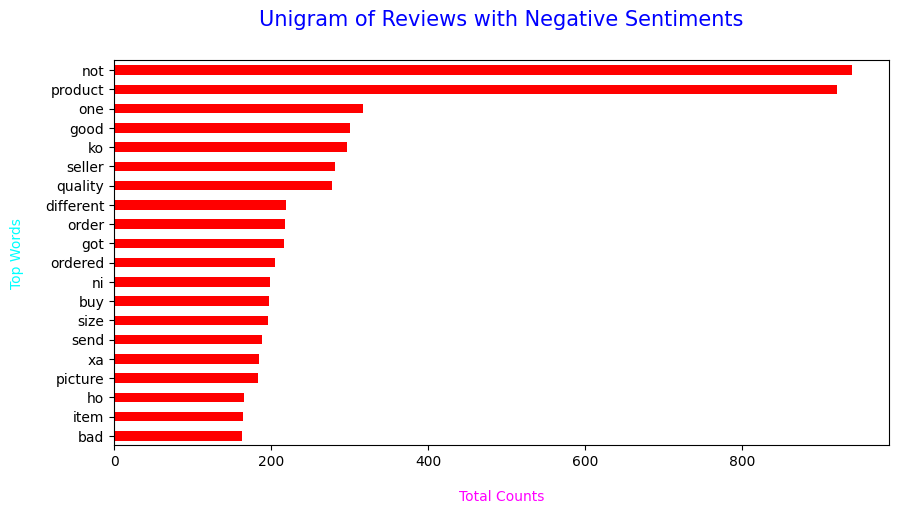

In [ ]:
# Finding Unigram
words = Gram_Analysis(Negative["cleaned_reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


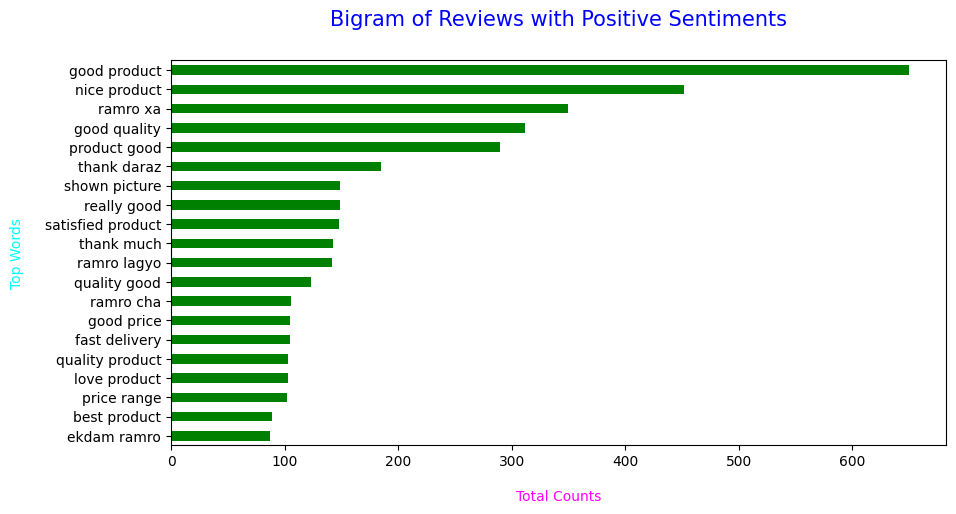

In [ ]:
# Finding Bigram
words = Gram_Analysis(Positive["cleaned_reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


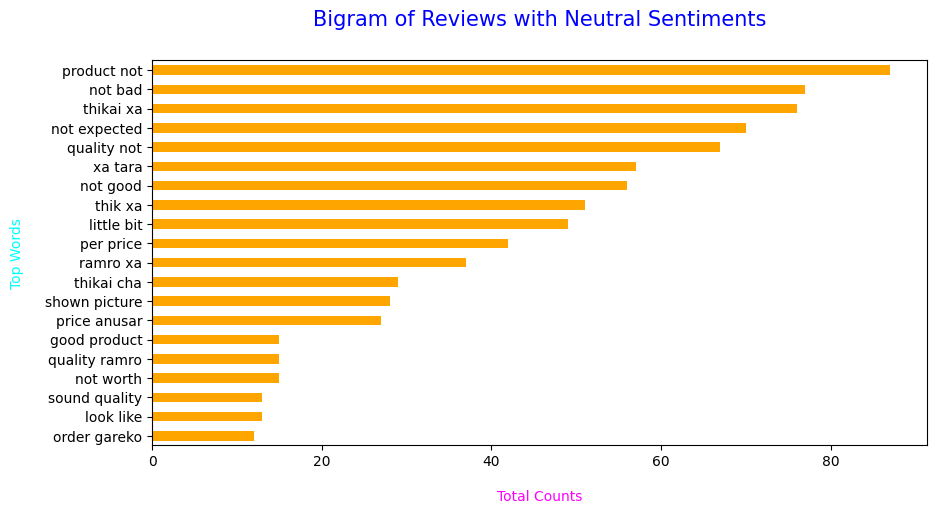

In [ ]:
# Finding Bigram
words = Gram_Analysis(Neutral["cleaned_reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

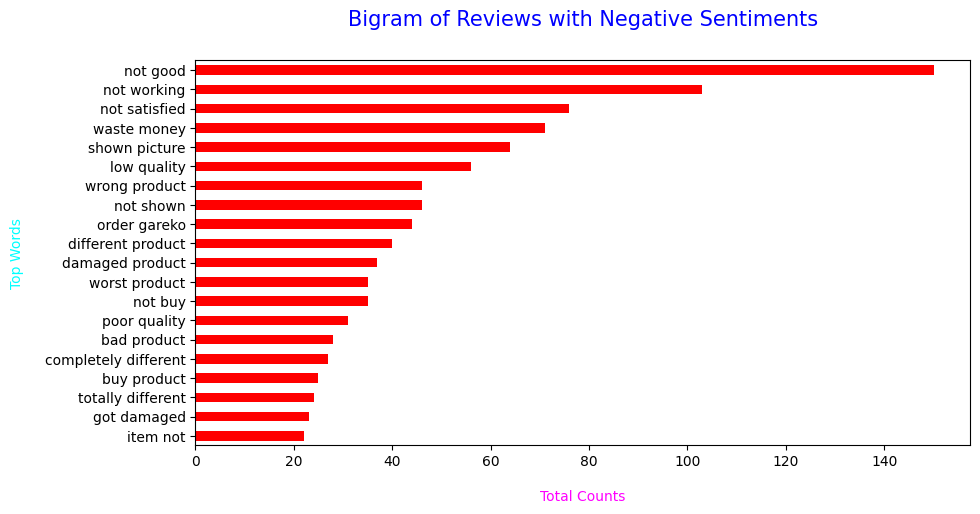

In [ ]:
# Finding Bigram
words = Gram_Analysis(Negative["cleaned_reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


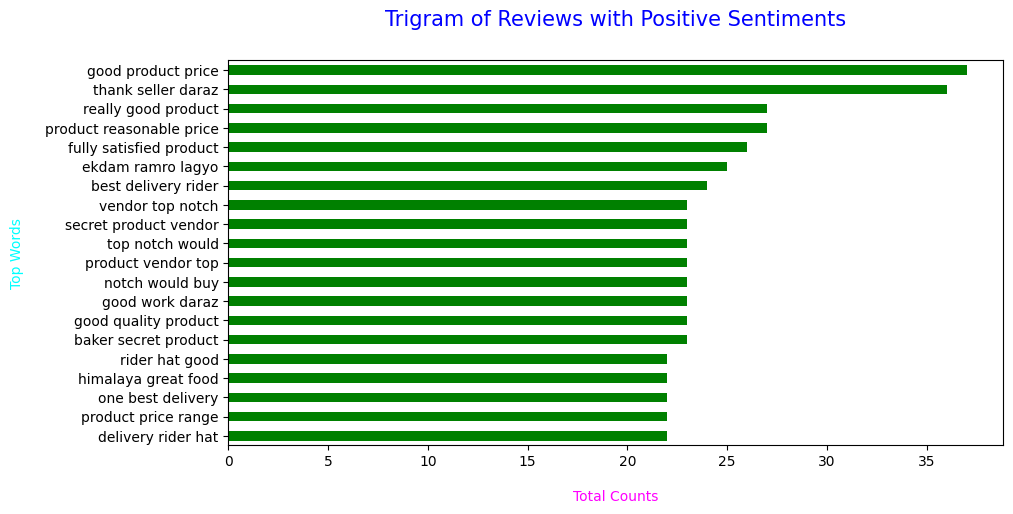

In [ ]:
# Finding Trigram
words = Gram_Analysis(Positive["cleaned_reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


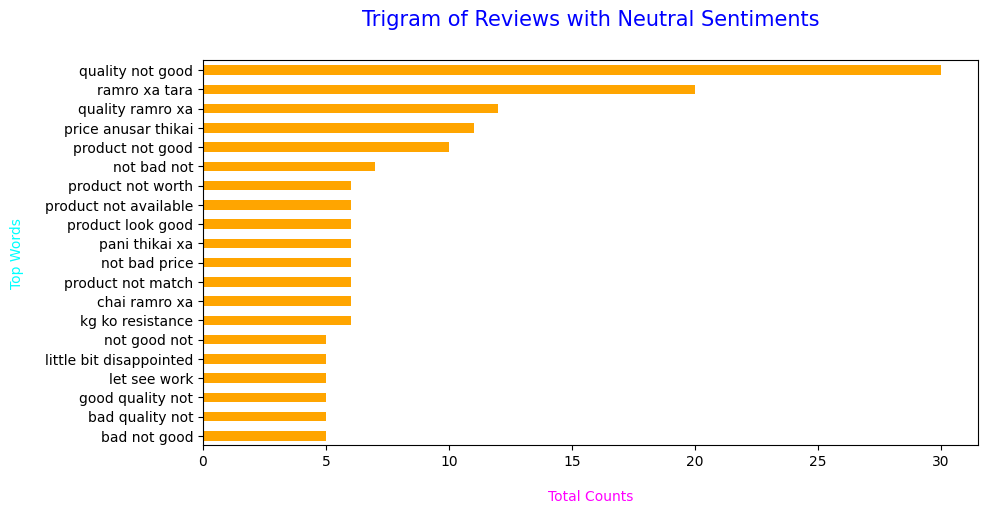

In [ ]:
# Finding Trigram
words = Gram_Analysis(Neutral["cleaned_reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()


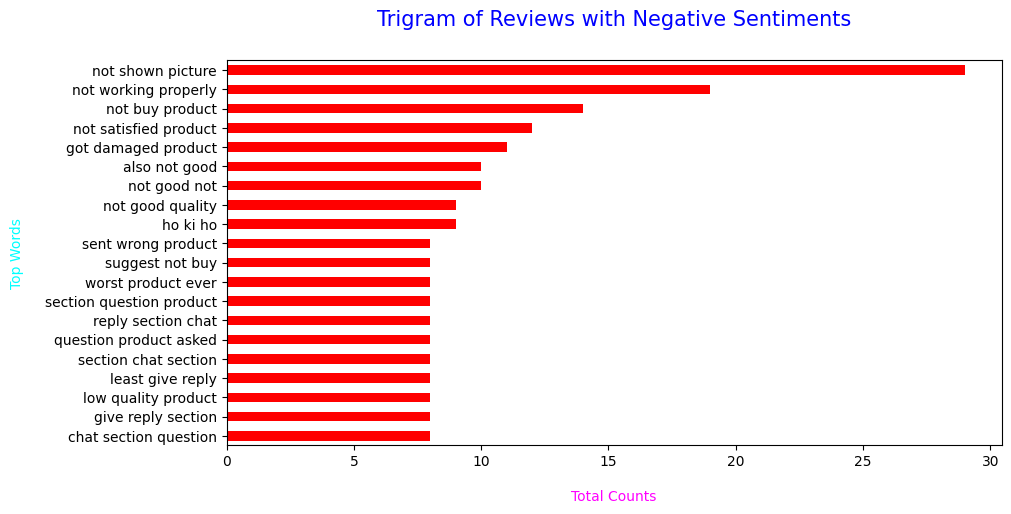

In [ ]:

# Finding Trigram
words = Gram_Analysis(Negative["cleaned_reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 25)
plt.xlabel("Total Counts", color = "magenta", fontsize = 10, labelpad = 15)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", color = "cyan", fontsize = 10, labelpad = 15)
plt.show()

In [ ]:
df

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts,new_sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000,60,10,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333,68,10,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000,24,4,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000,11,2,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303,259,39,Positive
...,...,...,...,...,...,...,...,...,...,...
34427,Pebbles Nepal 10 pieces Long Lasting Natural P...,ahhh...... tattoo was good hai but lagaune man...,5,ahhh tattoo was good hai but lagaune man...,ahhh tattoo good hai lagaune manxe thiyena big...,Positive,0.700000,124,22,Positive
34429,Silver Crest Electric Meat Grinder 3 ltr ( 1 Y...,Got damaged product.,1,got damaged product,got damaged product,Negative,0.000000,19,3,Negative
34435,Black Waterproof And Windproof Touch Screen Glove,"windproof and waterproof, warm fur inside. Mat...",5,windproof and waterproof warm fur inside mat...,windproof waterproof warm fur inside material ...,Positive,0.383333,73,10,Positive
34436,Polar Gown For Ladies,maile magako color purple aayo pink j gare ni...,1,maile magako color purple aayo pink j gare ni...,maile magako color purple aayo pink j gare ni ...,Negative,-0.100000,75,16,Negative


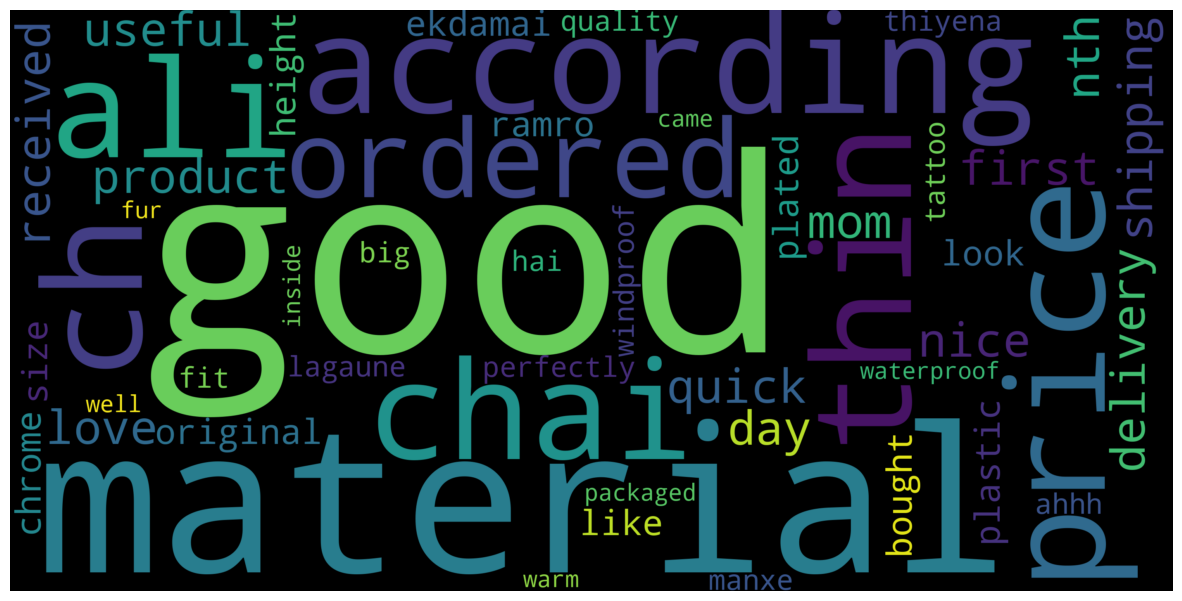

In [ ]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["cleaned_reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

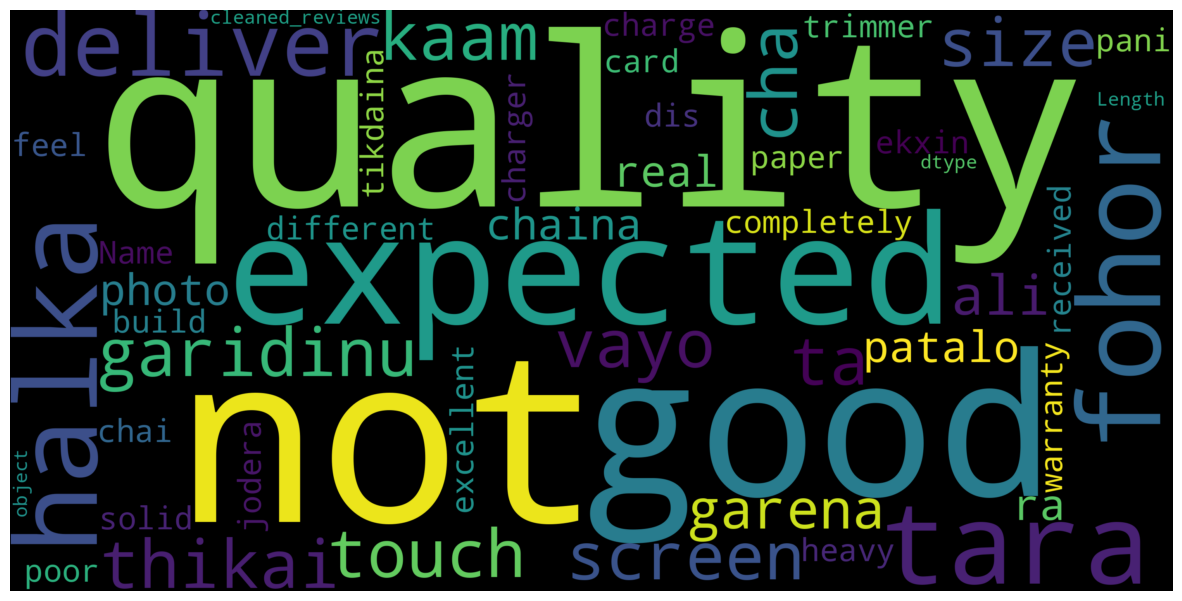

In [ ]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["cleaned_reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

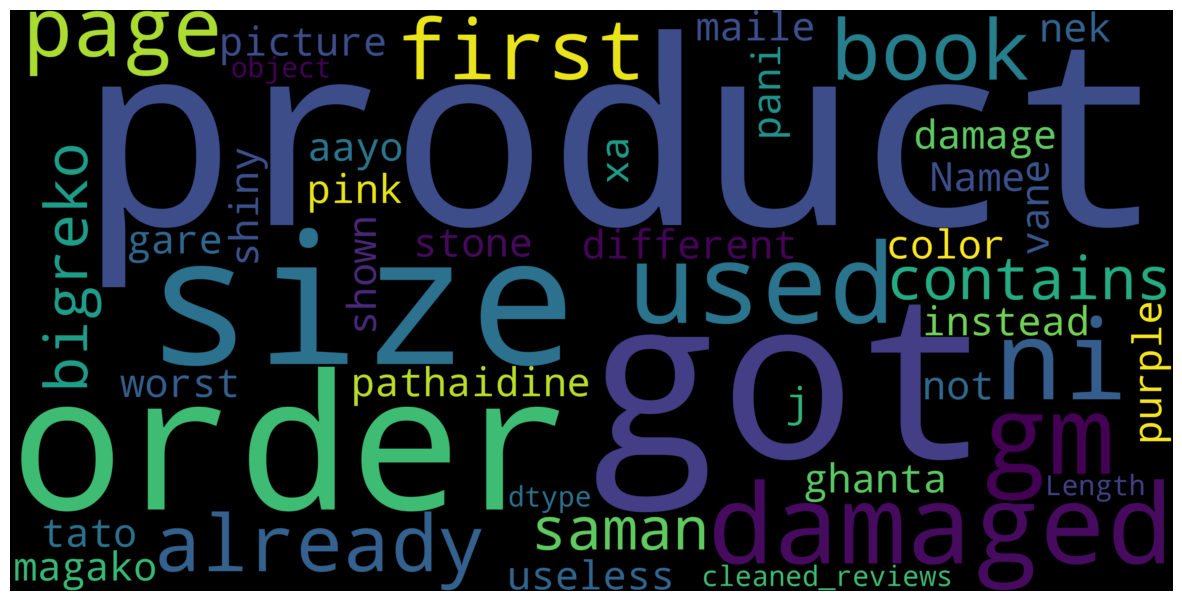

In [ ]:

wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["cleaned_reviews"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.head(5)

,Product,Review,Rating,clean_reviews,cleaned_reviews,sentiment,polarity,length,word_counts,new_sentiment
0,Moisture Matte Long Stay Lipstick - 2g | Espre...,It’s good tara halka fohor deliver garidinu va...,3,it’s good tara halka fohor deliver garidinu va...,’ good tara halka fohor deliver garidinu vayo ...,Neutral,0.300000,60,10,Neutral
1,ComfySlim 3 in 1 Postpartum Support Recovery B...,good according to its price.. material chai al...,5,good according to its price material chai al...,good according price material chai ali thin ch...,Positive,0.233333,68,10,Positive
3,Khadi Natural Hand Cream Milk & Saffron - With...,I ordered this product for my mom and she love...,5,i ordered this product for my mom and she love...,ordered product mom love,Positive,0.500000,24,4,Positive
6,Kitchen Cabinet Doors Hanging Plastic Trash Mu...,Nice and useful,5,nice and useful,nice useful,Positive,0.450000,11,2,Positive
8,Hoco UPA20 3.5 audio extension cable male to f...,First of all quick shipping and delivery(recei...,5,first of all quick shipping and delivery recei...,first quick shipping delivery received day nth...,Positive,0.240303,259,39,Positive


In [ ]:

Columns = ["Product", "Review", "Rating", "clean_reviews", "polarity", "length", "word_counts", "new_sentiment"]
df.drop(columns = Columns, axis = 1, inplace = True)

<ipython-input-67-6769dd9fc1d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = Columns, axis = 1, inplace = True)


In [ ]:
df

,cleaned_reviews,sentiment
0,’ good tara halka fohor deliver garidinu vayo ...,Neutral
1,good according price material chai ali thin ch...,Positive
3,ordered product mom love,Positive
6,nice useful,Positive
8,first quick shipping delivery received day nth...,Positive
...,...,...
34427,ahhh tattoo good hai lagaune manxe thiyena big...,Positive
34429,got damaged product,Negative
34435,windproof waterproof warm fur inside material ...,Positive
34436,maile magako color purple aayo pink j gare ni ...,Negative


In [ ]:
Encoder = LabelEncoder()
df["sentiment"] = Encoder.fit_transform(df["sentiment"])

<ipython-input-69-b505f39d3ce7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment"] = Encoder.fit_transform(df["sentiment"])


In [ ]:
df

,cleaned_reviews,sentiment
0,’ good tara halka fohor deliver garidinu vayo ...,1
1,good according price material chai ali thin ch...,2
3,ordered product mom love,2
6,nice useful,2
8,first quick shipping delivery received day nth...,2
...,...,...
34427,ahhh tattoo good hai lagaune manxe thiyena big...,2
34429,got damaged product,0
34435,windproof waterproof warm fur inside material ...,2
34436,maile magako color purple aayo pink j gare ni ...,0


In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
2,12142
0,2887
1,1048


In [ ]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["cleaned_reviews"])

# Check our matrix shape
X.shape

(16077, 5000)

In [ ]:

# Declaring our target variable
y = df["sentiment"]

In [ ]:
Counter(y)

Counter({1: 1048, 2: 12142, 0: 2887})

In [ ]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [ ]:

Counter(y_final)

Counter({1: 12142, 2: 12142, 0: 12142})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.15, random_state = 42)

In [ ]:
LogReg = LogisticRegression()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [LogReg, Bayes, KNN]
Models_Dict = {0: "Logistic Regression",1: "Naive Bayes", 2: "K-Neighbors"}



In [ ]:

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Logistic Regression Test Accuracy: 0.8323056466268532
Naive Bayes Test Accuracy: 0.8129619094942214
K-Neighbors Test Accuracy: 0.780360294049355


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Convert X to a dense array if it's a sparse matrix
if hasattr(X, 'toarray'):  # Check if X is a sparse matrix
    X = X.toarray()

# Define the metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}
for i, model in enumerate(Models):
  print(f'{model}')
  # Use cross_validate to calculate all metrics
  results = cross_validate(model, X, y, cv=10, scoring=scoring, return_train_score=False)

  # Print the results
  print(f"Accuracy: {results['test_accuracy'].mean():.4f}")
  print(f"Precision: {results['test_precision'].mean():.4f}")
  print(f"Recall: {results['test_recall'].mean():.4f}")
  print(f"F1-Score: {results['test_f1'].mean():.4f}")


LogisticRegression()
Accuracy: 0.8323
Precision: 0.8158
Recall: 0.8323
F1-Score: 0.7954
BernoulliNB()
Accuracy: 0.8130
Precision: 0.7917
Recall: 0.8130
F1-Score: 0.7929
KNeighborsClassifier()
Accuracy: 0.8093
Precision: 0.7835
Recall: 0.8093
F1-Score: 0.7753
